<a href="https://colab.research.google.com/github/PushkarAwasthi/PushkarAwasthi/blob/main/Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [9]:
df=pd.read_csv('/content/unimelb_training.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df.head(10)

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,...,Faculty.No..13,With.PHD.13,No..of.Years.in.Uni.at.Time.of.Grant.13,Number.of.Successful.Grant.13,Number.of.Unsuccessful.Grant.13,A..13,A.13,B.13,C.13,Person.ID.14,Role.14,Year.of.Birth.14,Country.of.Birth.14,Home.Language.14,Dept.No..14,Faculty.No..14,With.PHD.14,No..of.Years.in.Uni.at.Time.of.Grant.14,Number.of.Successful.Grant.14,Number.of.Unsuccessful.Grant.14,A..14,A.14,B.14,C.14,Person.ID.15,Role.15,Year.of.Birth.15,Country.of.Birth.15,Home.Language.15,Dept.No..15,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,1965.0,Asia Pacific,Other,3073.0,31.0,NaN,Less than 0,0.0,0.0,4.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,280203.0,40.0,0.0,0.0,0.0,0.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2538.0,25.0,Yes,more than 15,0.0,0.0,6.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,1955.0,Australia,NaN,2923.0,25.0,Yes,>5 to 10,0.0,0.0,0.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,1955.0,Australia,NaN,2678.0,25.0,Yes,>5 to 10,0.0,0.0,0.0,3.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,59C,10A,A,16/11/05,260500.0,34.0,280000.0,33.0,290000.0,33.0,0.0,0.0,0.0,0.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13042.0,CHIEF_INVESTIGATOR,1965.0,Western Europe,NaN,2153.0,19.0,Yes,>5 to 10,0.0,0.0,3.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,4D,10A,NaN,19/11/05,321204.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730211.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301472.0,CHIEF_INVESTIGATOR,1950.0,Australia,NaN,2533.0,25.0,Yes,>=0 to 5,2.0,0.0,7.0,27.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,2B,10A,NaN,19/11/05,270708.0,50.0,270203.0,30.0,270401.0,20.0,0.0,0.0,0.0,0.0,770703.0,60.0,770706.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,74292.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,3028.0,31.0,Yes,>10 to 15,0.0,0.0,8.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,28D,30B,A,19/11

In [11]:
df['Role.1'].value_counts()

CHIEF_INVESTIGATOR         7741
EXT_CHIEF_INVESTIGATOR      413
PRINCIPAL_SUPERVISOR        332
DELEGATED_RESEARCHER        101
STUD_CHIEF_INVESTIGATOR      11
HONVISIT                     11
EXTERNAL_ADVISOR              1
Name: Role.1, dtype: int64

In [12]:
Approval=df[df['Grant.Status']!=0]
Approval.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,...,Faculty.No..13,With.PHD.13,No..of.Years.in.Uni.at.Time.of.Grant.13,Number.of.Successful.Grant.13,Number.of.Unsuccessful.Grant.13,A..13,A.13,B.13,C.13,Person.ID.14,Role.14,Year.of.Birth.14,Country.of.Birth.14,Home.Language.14,Dept.No..14,Faculty.No..14,With.PHD.14,No..of.Years.in.Uni.at.Time.of.Grant.14,Number.of.Successful.Grant.14,Number.of.Unsuccessful.Grant.14,A..14,A.14,B.14,C.14,Person.ID.15,Role.15,Year.of.Birth.15,Country.of.Birth.15,Home.Language.15,Dept.No..15,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,1965.0,Asia Pacific,Other,3073.0,31.0,NaN,Less than 0,0.0,0.0,4.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,280203.0,40.0,0.0,0.0,0.0,0.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2538.0,25.0,Yes,more than 15,0.0,0.0,6.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,1955.0,Australia,NaN,2923.0,25.0,Yes,>5 to 10,0.0,0.0,0.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,1955.0,Australia,NaN,2678.0,25.0,Yes,>5 to 10,0.0,0.0,0.0,3.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,4D,10A,NaN,19/11/05,321204.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730211.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301472.0,CHIEF_INVESTIGATOR,1950.0,Australia,NaN,2533.0,25.0,Yes,>=0 to 5,2.0,0.0,7.0,27.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[['Role.1', 'Grant.Status']].groupby(['Role.1'], as_index=False).mean().sort_values(by='Grant.Status', ascending=False)

,Role.1,Grant.Status
5,PRINCIPAL_SUPERVISOR,0.521084
1,DELEGATED_RESEARCHER,0.465347
0,CHIEF_INVESTIGATOR,0.464927
3,EXT_CHIEF_INVESTIGATOR,0.305085
6,STUD_CHIEF_INVESTIGATOR,0.181818
4,HONVISIT,0.090909
2,EXTERNAL_ADVISOR,0.000000


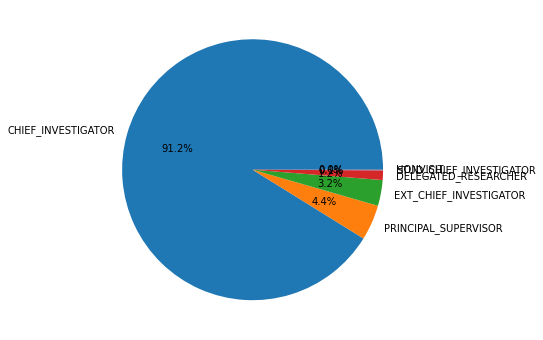

In [14]:
plt.figure(figsize=(6,6))
plt.pie(list(Approval['Role.1'].value_counts()),labels=list(Approval['Role.1'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [15]:
df['Country.of.Birth.1'].value_counts()

Australia                 5445
Great Britain              661
Western Europe             332
Asia Pacific               330
North America              265
Eastern Europe             119
New Zealand                 79
Middle East and Africa      77
The Americas                72
South Africa                48
Name: Country.of.Birth.1, dtype: int64

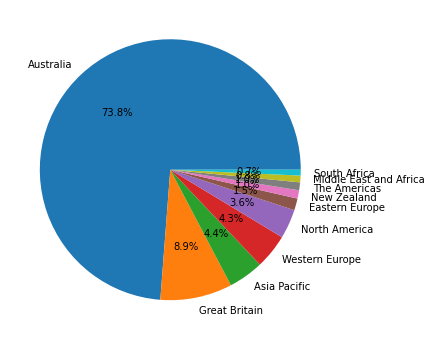

In [16]:
plt.figure(figsize=(6,6))
plt.pie(list(Approval['Country.of.Birth.1'].value_counts()),labels=list(Approval['Country.of.Birth.1'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [17]:
df[['Country.of.Birth.1', 'Grant.Status']].groupby(['Country.of.Birth.1'], as_index=False).mean().sort_values(by='Grant.Status', ascending=False)

,Country.of.Birth.1,Grant.Status
7,South Africa,0.520833
6,North America,0.479245
1,Australia,0.472911
8,The Americas,0.472222
3,Great Britain,0.470499
0,Asia Pacific,0.460606
5,New Zealand,0.455696
9,Western Europe,0.451807
2,Eastern Europe,0.428571
4,Middle East and Africa,0.376623


In [18]:
df['Year.of.Birth.1'].value_counts()

1965.0    1601
1960.0    1543
1970.0    1291
1955.0    1097
1975.0     962
1950.0     807
1945.0     405
1980.0     322
1940.0     125
1935.0      17
1930.0       5
1985.0       4
1925.0       2
Name: Year.of.Birth.1, dtype: int64

In [19]:
df[['Year.of.Birth.1', 'Grant.Status']].groupby(['Year.of.Birth.1'], as_index=False).mean().sort_values(by='Grant.Status', ascending=False)

,Year.of.Birth.1,Grant.Status
0,1925.0,1.000000
1,1930.0,0.800000
5,1950.0,0.532838
4,1945.0,0.498765
6,1955.0,0.491340
7,1960.0,0.474401
9,1970.0,0.451588
10,1975.0,0.442827
8,1965.0,0.439725
3,1940.0,0.432000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Columns: 252 entries, Grant.Application.ID to Unnamed: 251
dtypes: float64(180), int64(2), object(70)
memory usage: 16.7+ MB


In [21]:
df.columns

Index(['Grant.Application.ID', 'Grant.Status', 'Sponsor.Code',
       'Grant.Category.Code', 'Contract.Value.Band...see.note.A', 'Start.date',
       'RFCD.Code.1', 'RFCD.Percentage.1', 'RFCD.Code.2', 'RFCD.Percentage.2',
       ...
       'Faculty.No..15', 'With.PHD.15',
       'No..of.Years.in.Uni.at.Time.of.Grant.15',
       'Number.of.Successful.Grant.15', 'Number.of.Unsuccessful.Grant.15',
       'A..15', 'A.15', 'B.15', 'C.15', 'Unnamed: 251'],
      dtype='object', length=252)

In [22]:
df.isnull().sum()

Grant.Application.ID                   0
Grant.Status                           0
Sponsor.Code                         912
Grant.Category.Code                  912
Contract.Value.Band...see.note.A    3563
                                    ... 
A..15                               8706
A.15                                8706
B.15                                8706
C.15                                8708
Unnamed: 251                        8708
Length: 252, dtype: int64

In [23]:
df.shape

(8708, 252)

In [24]:
#features to exclude from analysis
features = ['Grant.Application.ID', 'Year.of.Birth.1', 'Start.date','Country.of.Birth.1', 'Unnamed: 251']
for col in range(1, 16):
    if 'No..of.Years.in.Uni.at.Time.of.Grant.'+ str(col) in list(df.columns):
        features.append('No..of.Years.in.Uni.at.Time.of.Grant.'+str(col))

#removing Nan data if greater than 3000
for col in list(df.columns):
    if df[col].isnull().sum() > 3000:
        features.append(col)

In [25]:
df = df.drop(features, axis=1)

In [26]:
df.shape

(8708, 33)

In [27]:
df

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,NaN,NaN,280199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,3073.0,31.0,0.0,0.0,4.0,2.0,0.0,0.0
1,1,2B,10A,280103.0,30.0,280106.0,30.0,280203.0,40.0,0.0,0.0,0.0,0.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,2538.0,25.0,0.0,0.0,6.0,12.0,2.0,2.0
2,1,29A,10B,321004.0,60.0,321216.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,2923.0,25.0,0.0,0.0,0.0,3.0,5.0,2.0
3,1,40D,10B,270602.0,50.0,320602.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,2678.0,25.0,0.0,0.0,0.0,3.0,13.0,3.0
4,0,59C,10A,260500.0,34.0,280000.0,33.0,290000.0,33.0,0.0,0.0,0.0,0.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13042.0,CHIEF_INVESTIGATOR,2153.0,19.0,0.0,0.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,21A,50A,321028.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730114.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20937.0,CHIEF_INVESTIGATOR,2763.0,25.0,1.0,11.0,4.0,7.0,2.0,0.0
8704,1,21A,50A,340299.0,50.0,390114.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,720299.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64237.0,CHIEF_INVESTIGATOR,1678.0,13.0,2.0,0.0,0.0,5.0,15.0,4.0
8705,0,137A,30B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68437.0,CHIEF_INVESTIGATOR,2103.0,19.0,1.0,3.0,3.0,4.0,5.0,20.0
8706,1,21A,50A,280210.0,40.0,239901.0,40.0,280206.0,20.0,0.0,0.0,0.0,0.0,671303.0,40.0,700302.0,30.0,780105.0,30.0,0.0,0.0,0.0,0.0,82722.0,CHIEF_INVESTIGATOR,2153.0,19.0,2.0,1.0,0.0,3.0,7.0,2.0


In [28]:
df.describe()

,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
count,8708.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8074.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8.185000e+03,7838.000000,7835.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000
mean,0.458429,314625.121006,75.005251,158842.523161,17.595281,92956.217736,6.883986,6551.696309,0.406490,1750.273223,0.108992,729862.288289,71.806315,427786.879662,20.433727,219602.471283,6.833180,31158.957235,0.726504,9512.741174,0.200149,1.657378e+05,2448.606660,24.074537,1.186072,2.118143,4.036408,5.541845,4.375321,2.289188
std,0.498297,51817.235580,26.836228,160685.895040,19.438356,146607.359501,11.806640,44953.214321,3.004969,23666.752850,1.613000,36652.360920,26.804067,359981.121888,20.135116,334849.816957,11.744401,147325.186492,3.849402,82791.607120,2.009481,2.474406e+05,745.753363,12.132504,1.534931,2.905626,7.762773,7.979154,5.948326,4.323978
min,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,610101.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.570000e+02,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,280204.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730104.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.850200e+04,2298.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,320704.000000,80.000000,230202.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,730111.000000,70.000000,700302.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.172700e+04,2628.000000,25.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000
75%,1.000000,321202.000000,100.000000,320700.750000,30.000000,270105.000000,10.000000,0.000000,0.000000,0.000000,0.000000,749906.000000,100.000000,730211.000000,40.000000,700299.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.145520e+05,2813.000000,25.000000,2.000000,3.000000,5.000000,7.000000,6.000000,3.000000
max,1.000000,999999.000000,100.000000,440209.000000,90.000000,440207.000000,80.000000,440202.000000,70.000000,419999.000000,40.000000,999999.000000,100.000000,780199.000000,90.000000,780199.000000,80.000000,780108.000000,50.000000,780108.000000,50.000000,1.162272e+06,4418.000000,187.000000,13.000000,26.000000,123.000000,95.000000,69.000000,61.000000


In [29]:
df.columns

Index(['Grant.Status', 'Sponsor.Code', 'Grant.Category.Code', 'RFCD.Code.1',
       'RFCD.Percentage.1', 'RFCD.Code.2', 'RFCD.Percentage.2', 'RFCD.Code.3',
       'RFCD.Percentage.3', 'RFCD.Code.4', 'RFCD.Percentage.4', 'RFCD.Code.5',
       'RFCD.Percentage.5', 'SEO.Code.1', 'SEO.Percentage.1', 'SEO.Code.2',
       'SEO.Percentage.2', 'SEO.Code.3', 'SEO.Percentage.3', 'SEO.Code.4',
       'SEO.Percentage.4', 'SEO.Code.5', 'SEO.Percentage.5', 'Person.ID.1',
       'Role.1', 'Dept.No..1', 'Faculty.No..1', 'Number.of.Successful.Grant.1',
       'Number.of.Unsuccessful.Grant.1', 'A..1', 'A.1', 'B.1', 'C.1'],
      dtype='object')

In [30]:
features = ['RFCD.Code.4', 'RFCD.Percentage.4','RFCD.Code.5', 'RFCD.Percentage.5','SEO.Code.4','SEO.Percentage.4','SEO.Code.5','SEO.Percentage.4']
df = df.drop(features, axis=1)

In [31]:
df.shape

(8708, 26)

In [32]:
#filling null values
for col in list(df.columns):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna(df[col].value_counts().idxmax())
    elif df[col].dtypes == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].max())

In [33]:
df.isnull().sum()

Grant.Status                      0
Sponsor.Code                      0
Grant.Category.Code               0
RFCD.Code.1                       0
RFCD.Percentage.1                 0
RFCD.Code.2                       0
RFCD.Percentage.2                 0
RFCD.Code.3                       0
RFCD.Percentage.3                 0
SEO.Code.1                        0
SEO.Percentage.1                  0
SEO.Code.2                        0
SEO.Percentage.2                  0
SEO.Code.3                        0
SEO.Percentage.3                  0
SEO.Percentage.5                  0
Person.ID.1                       0
Role.1                            0
Dept.No..1                        0
Faculty.No..1                     0
Number.of.Successful.Grant.1      0
Number.of.Unsuccessful.Grant.1    0
A..1                              0
A.1                               0
B.1                               0
C.1                               0
dtype: int64

In [34]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,4D,10A,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,3073.0,31.0,0.0,0.0,4.0,2.0,0.0,0.0
1,1,2B,10A,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,2538.0,25.0,0.0,0.0,6.0,12.0,2.0,2.0
2,1,29A,10B,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,2923.0,25.0,0.0,0.0,0.0,3.0,5.0,2.0
3,1,40D,10B,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,2678.0,25.0,0.0,0.0,0.0,3.0,13.0,3.0
4,0,59C,10A,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,13042.0,CHIEF_INVESTIGATOR,2153.0,19.0,0.0,0.0,3.0,0.0,1.0,0.0


In [35]:
df.dtypes

Grant.Status                        int64
Sponsor.Code                       object
Grant.Category.Code                object
RFCD.Code.1                       float64
RFCD.Percentage.1                 float64
RFCD.Code.2                       float64
RFCD.Percentage.2                 float64
RFCD.Code.3                       float64
RFCD.Percentage.3                 float64
SEO.Code.1                        float64
SEO.Percentage.1                  float64
SEO.Code.2                        float64
SEO.Percentage.2                  float64
SEO.Code.3                        float64
SEO.Percentage.3                  float64
SEO.Percentage.5                  float64
Person.ID.1                       float64
Role.1                             object
Dept.No..1                        float64
Faculty.No..1                     float64
Number.of.Successful.Grant.1      float64
Number.of.Unsuccessful.Grant.1    float64
A..1                              float64
A.1                               

In [36]:
## Transform to Encoder

from sklearn.preprocessing import LabelEncoder

## Transform to Encoder in train set

for col in list(df.columns):
    if df[col].dtypes == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [37]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,255,0,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,40572.0,0,3073.0,31.0,0.0,0.0,4.0,2.0,0.0,0.0
1,1,187,0,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,9067.0,0,2538.0,25.0,0.0,0.0,6.0,12.0,2.0,2.0
2,1,186,1,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,5967.0,0,2923.0,25.0,0.0,0.0,0.0,3.0,5.0,2.0
3,1,236,1,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,78782.0,5,2678.0,25.0,0.0,0.0,0.0,3.0,13.0,3.0
4,0,263,0,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,13042.0,0,2153.0,19.0,0.0,0.0,3.0,0.0,1.0,0.0


In [38]:
df.dtypes

Grant.Status                        int64
Sponsor.Code                        int64
Grant.Category.Code                 int64
RFCD.Code.1                       float64
RFCD.Percentage.1                 float64
RFCD.Code.2                       float64
RFCD.Percentage.2                 float64
RFCD.Code.3                       float64
RFCD.Percentage.3                 float64
SEO.Code.1                        float64
SEO.Percentage.1                  float64
SEO.Code.2                        float64
SEO.Percentage.2                  float64
SEO.Code.3                        float64
SEO.Percentage.3                  float64
SEO.Percentage.5                  float64
Person.ID.1                       float64
Role.1                              int64
Dept.No..1                        float64
Faculty.No..1                     float64
Number.of.Successful.Grant.1      float64
Number.of.Unsuccessful.Grant.1    float64
A..1                              float64
A.1                               

In [39]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Dept.No..1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,255,0,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,100.0,0.0,0.0,0.0,0.0,0.0,40572.0,0,3073.0,31.0,0.0,0.0,4.0,2.0,0.0,0.0
1,1,187,0,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,50.0,700102.0,50.0,0.0,0.0,0.0,9067.0,0,2538.0,25.0,0.0,0.0,6.0,12.0,2.0,2.0
2,1,186,1,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,60.0,730207.0,40.0,0.0,0.0,0.0,5967.0,0,2923.0,25.0,0.0,0.0,0.0,3.0,5.0,2.0
3,1,236,1,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,70.0,730201.0,30.0,0.0,0.0,0.0,78782.0,5,2678.0,25.0,0.0,0.0,0.0,3.0,13.0,3.0
4,0,263,0,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,100.0,0.0,0.0,0.0,0.0,0.0,13042.0,0,2153.0,19.0,0.0,0.0,3.0,0.0,1.0,0.0


In [40]:
df['Sponsor.Code'].describe()

count    8708.000000
mean      201.401700
std        69.047989
min         0.000000
25%       186.000000
50%       222.000000
75%       255.000000
max       296.000000
Name: Sponsor.Code, dtype: float64

In [41]:
df['Grant.Status'].value_counts()

0    4716
1    3992
Name: Grant.Status, dtype: int64

In [42]:
df['Grant.Category.Code'].describe()

count    8708.000000
mean        2.741387
std         3.951463
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        12.000000
Name: Grant.Category.Code, dtype: float64

In [43]:
df['Role.1'].describe()

count    8708.000000
mean        0.357373
std         1.153333
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Role.1, dtype: float64

(3992, 26) (4716, 26)


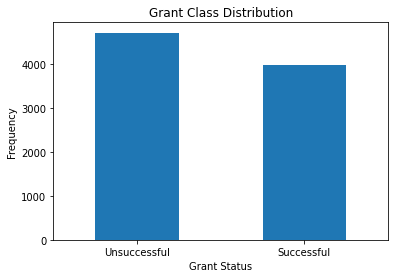

In [44]:
count_classes = pd.value_counts(df['Grant.Status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Grant Class Distribution")

LABELS=['Unsuccessful','Successful']

plt.xticks(range(2), LABELS)

plt.xlabel("Grant Status")

plt.ylabel("Frequency")

Successful = df[df['Grant.Status']==1]

Unsuccessful = df[df['Grant.Status']==0]

print(Successful.shape,Unsuccessful.shape)

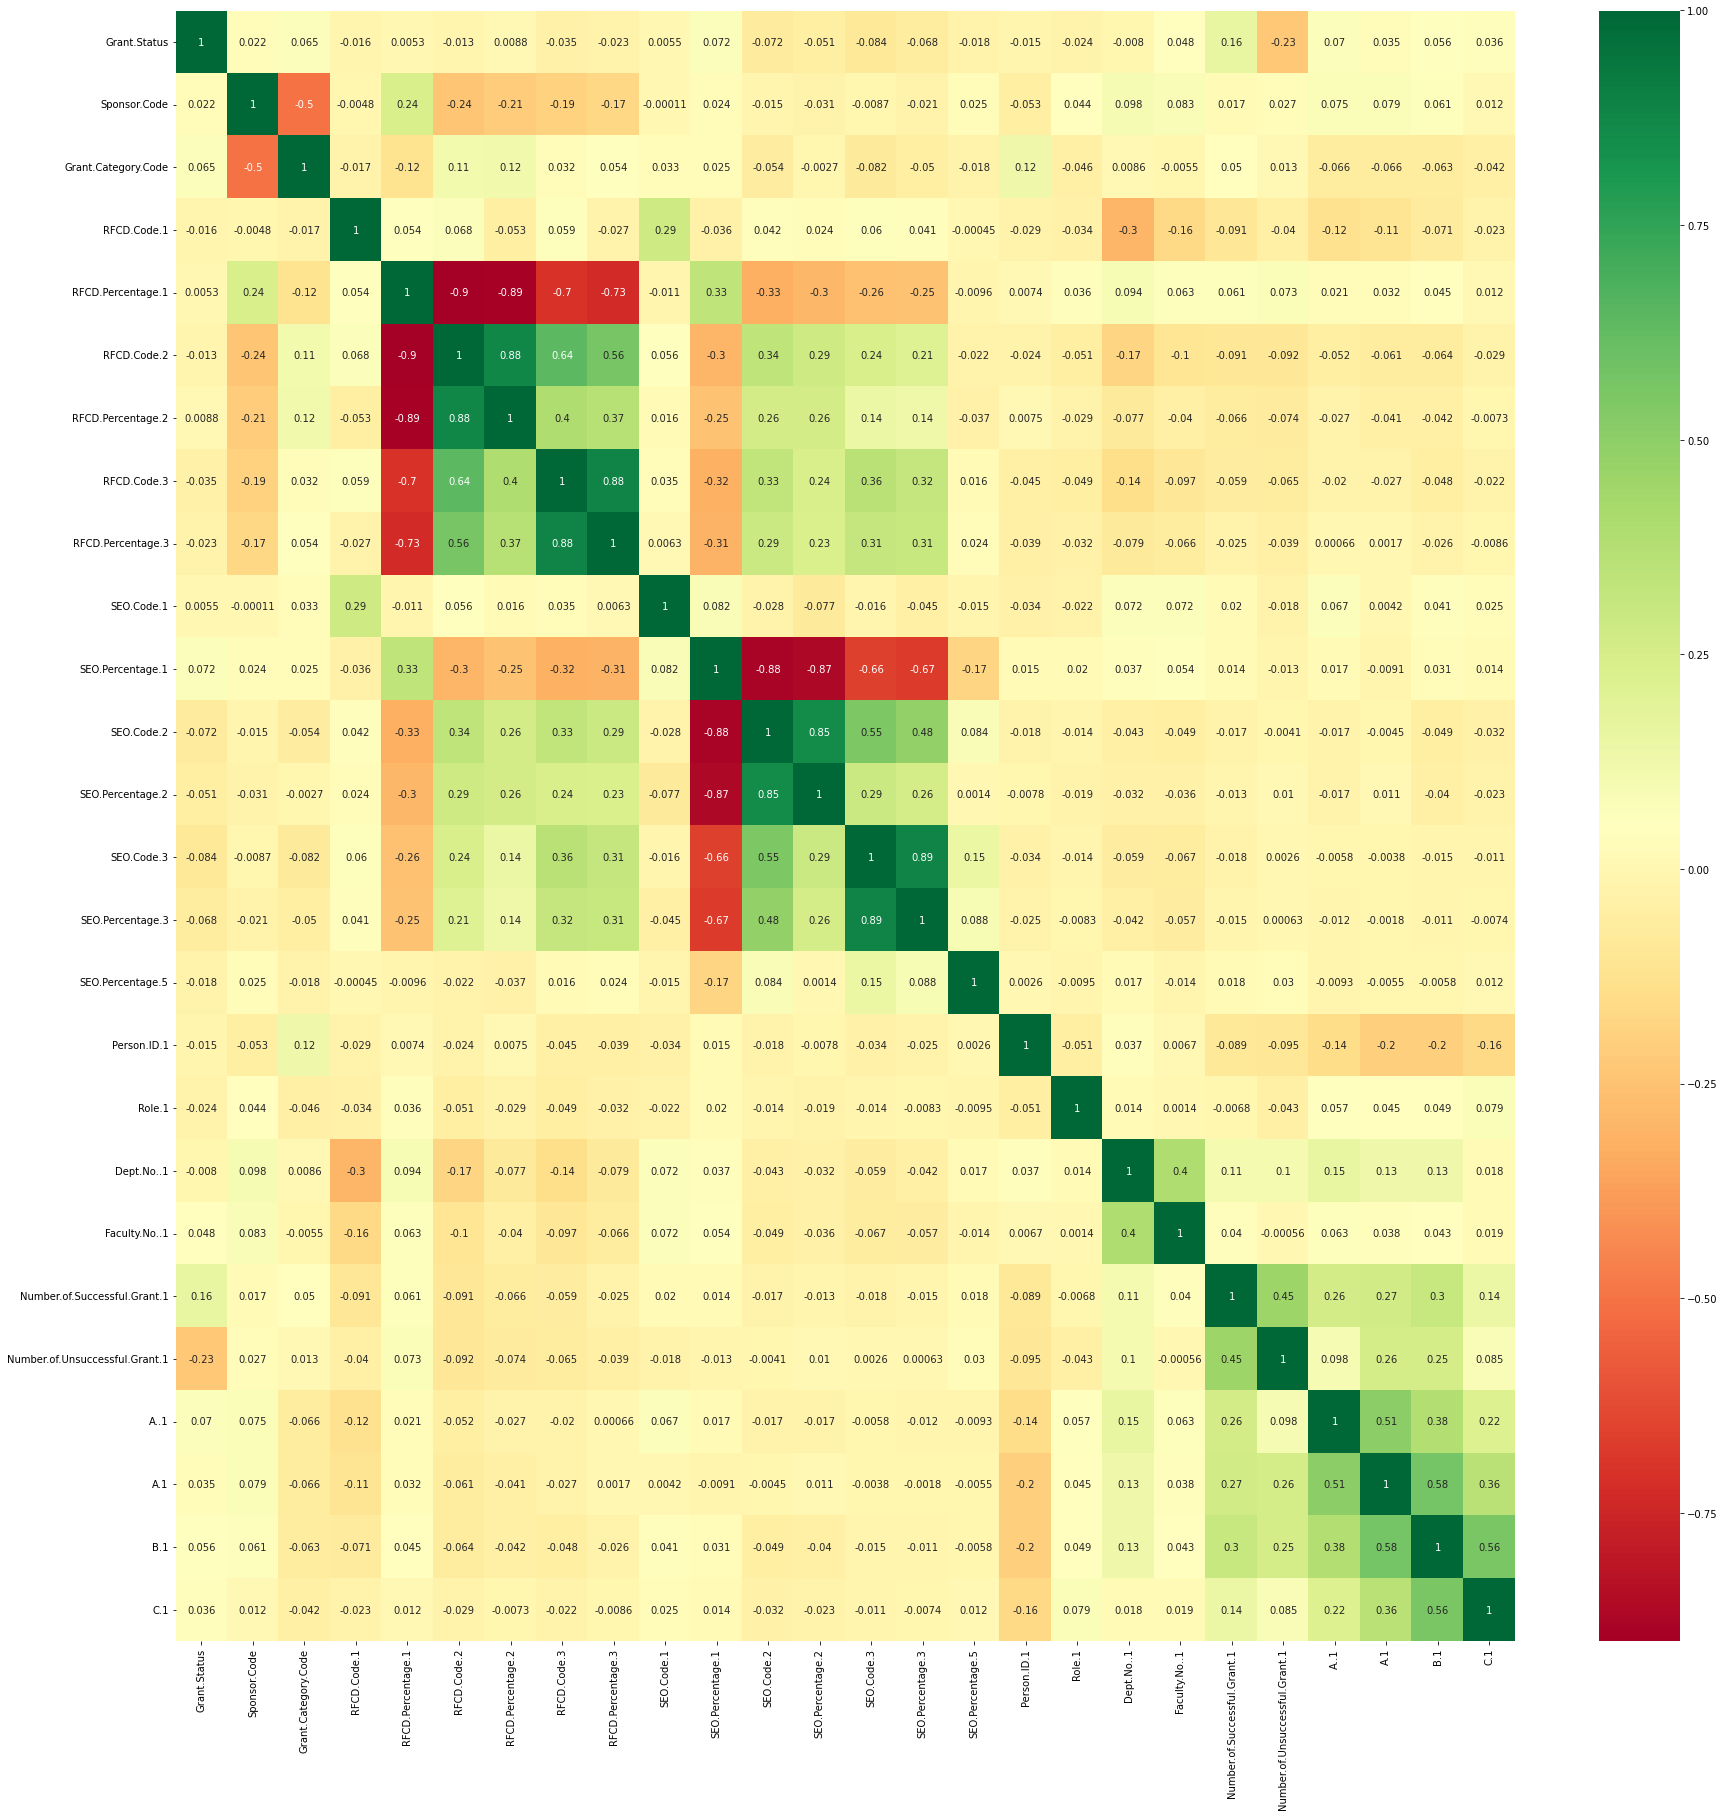

In [45]:
## Correlation
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

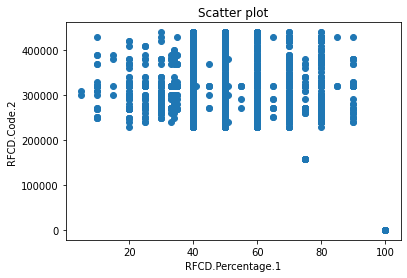

In [46]:
plt.scatter(df['RFCD.Percentage.1'],df['RFCD.Code.2'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Scatter plot')
plt.xlabel('RFCD.Percentage.1')
plt.ylabel('RFCD.Code.2')
plt.show()

In [47]:
y = df['Grant.Status']
X = df.drop(['Grant.Status'], axis=1)

In [48]:
## Split data to train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6095, 25), (2613, 25), (6095,), (2613,))

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.618828932261768

In [52]:
y_pred  =  classifier.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [54]:
print(cm)
print('accuracy =',ac)
print(cr)

[[1075  338]
 [ 658  542]]
accuracy = 0.618828932261768
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1413
           1       0.62      0.45      0.52      1200

    accuracy                           0.62      2613
   macro avg       0.62      0.61      0.60      2613
weighted avg       0.62      0.62      0.61      2613



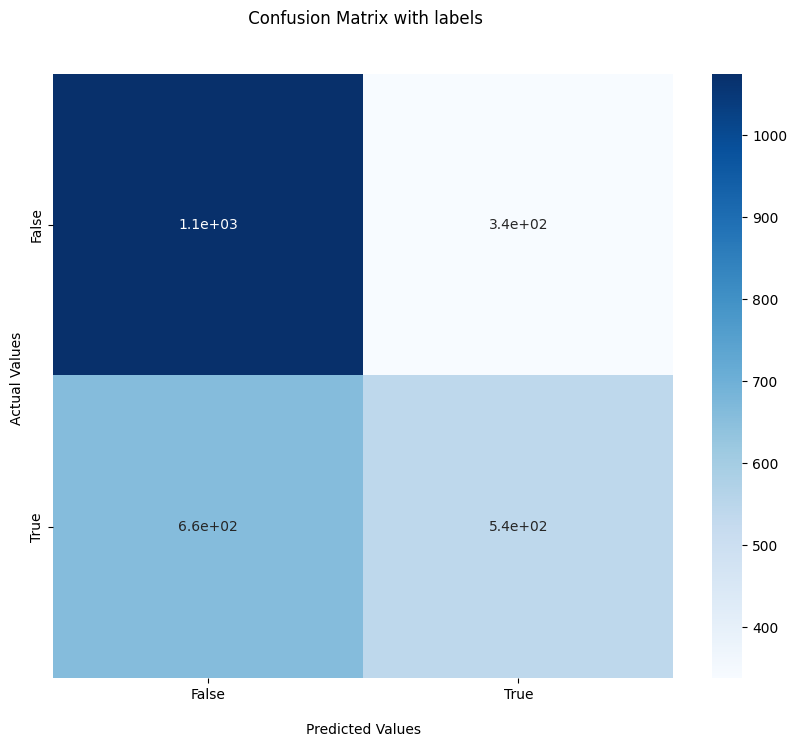

In [55]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7236892460773058

In [58]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

model = RandomForestClassifier(n_estimators=5000, max_depth=5, random_state=0)
model.fit(X_train, y_train)
random_forest_Pred = model.predict(X_test)

print(rmsle(y_test, random_forest_Pred))

0.4976023646243605


In [59]:
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train, y_train)
Y_pred = grad_boost.predict(X_test)

print(rmsle(y_test, Y_pred))

0.4645899887372762


In [60]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred_3 = svc.predict(X_test)

print(rmsle(y_test, Y_pred_3))

0.4995213935918571


In [61]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
Y_pred_2 = neigh.predict(X_test)

print(rmsle(y_test, Y_pred_2))

0.5760230254359426


In [62]:
from sklearn.model_selection import KFold
model=GaussianNB()
kfold_validation=KFold(10)

In [63]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.5315729  0.42365098 0.51779564 0.57864524 0.53960964 0.53501722
 0.58323766 0.55797933 0.56321839 0.59425287]
0.5424979875160009
